In [10]:
#importing necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [12]:
# 1. Create the dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': ['False', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'True'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

In [13]:
#accessing the data into dataframe df
df = pd.DataFrame(data)

In [14]:
df

,Outlook,Temperature,Humidity,Windy,PlayTennis
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Rain,Mild,High,False,Yes
4,Rain,Cool,Normal,False,Yes
5,Rain,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Sunny,Mild,High,False,No
8,Sunny,Cool,Normal,False,Yes
9,Rain,Mild,Normal,False,Yes


In [15]:
# 2. Encode categorical features
# Convert categorical features into numerical representations
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

In [16]:
# 3. Define features (X) and target (y)
X = df[['Outlook', 'Temperature', 'Humidity', 'Windy']]
y = df['PlayTennis']

In [17]:
# 4. Create and train the Decision Tree Classifier
# Using 'entropy' as the criterion for information gain
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

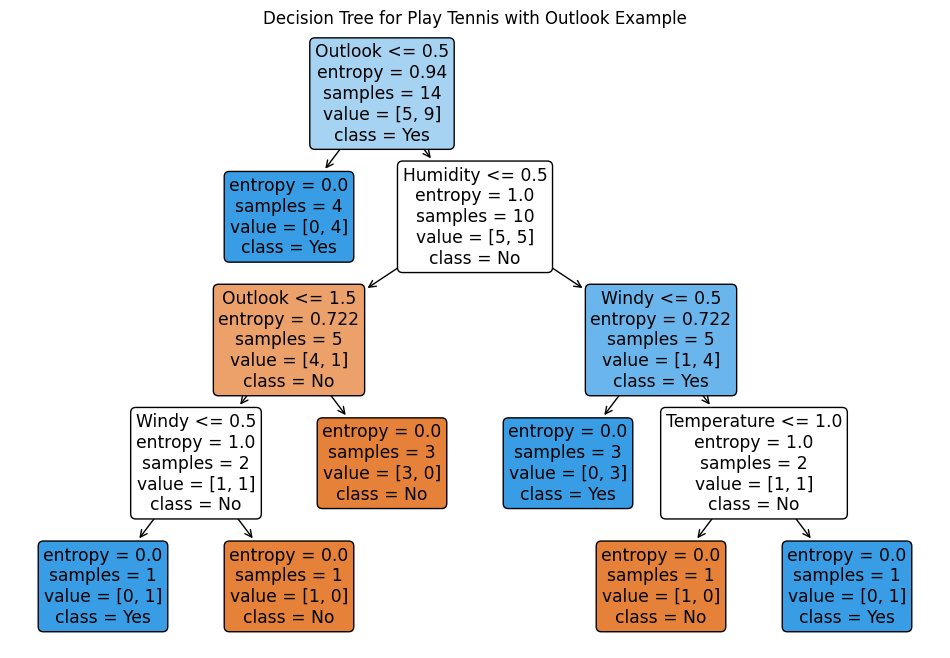

In [18]:
# 5. Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title("Decision Tree for Play Tennis with Outlook Example")
plt.show()

In [20]:
# 6. Make a prediction for a new instance
# Example: Sunny, Mild, Normal, False
new_data = pd.DataFrame([[2, 1, 1, 0]], columns=X.columns) # Encoded values
prediction = clf.predict(new_data)

print(f"\nPrediction for new data (Outlook: Sunny, Temp: Mild, Humidity: Normal, Windy: False): {le.inverse_transform(prediction)[0]}")
#This method of the LabelEncoder takes the numerical prediction (or an array of predictions) 
#and converts it back to the original categorical label(s) based on the mapping learned during the fit process.


Prediction for new data (Outlook: Sunny, Temp: Mild, Humidity: Normal, Windy: False): Yes
